# 图像处理+180776+胡欣毅(Python版)
# 15周上课随堂任务

1. 二维高斯函数等高线值的角度特征
2. 二维高斯函数等高线值的角度旋转
3. Gabor初步

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import cm
import matplotlib as mpl
import numpy as np
import cv2

In [2]:
def rotate(image, angle, center=None, scale=1.0):
    # angle 负是顺时针旋转
    (h, w) = image.shape[:2]
    if center is None:
        center = (w // 2, h // 2) 
    M = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

In [3]:
sigma1 = 1.
sigma2 = 2.
ro = [-0.9 ,-0.4 , 0 , 0.4 , 0.9]

X = np.arange(-10, 10, 0.2)
Y = np.arange(-10, 10, 0.2)
X, Y = np.meshgrid(X, Y)
X_len,Y_len = len(X)//2 ,len(Y)//2

### 二维高斯函数FFT、等高线值、角度旋转

旋转角： 25.097214453867405


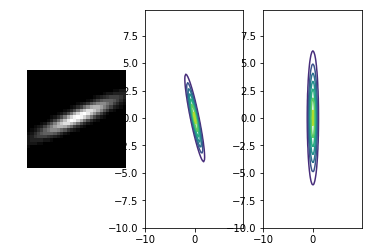

旋转角： 14.036243467926479


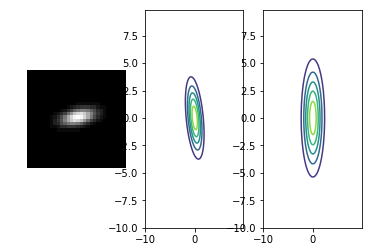

旋转角： -0.0


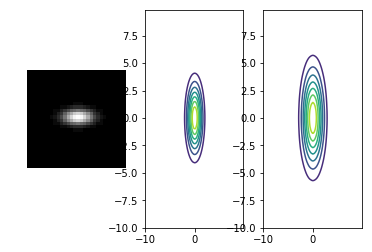

旋转角： -14.036243467926479


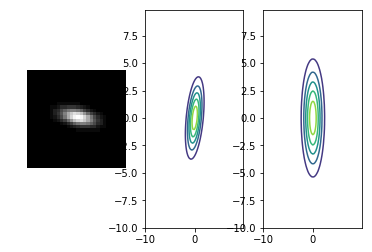

旋转角： -25.097214453867405


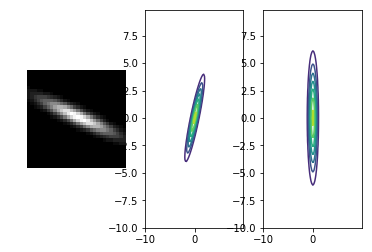

In [4]:
for i in range(len(ro)):
    rho = ro[i]

    Z = np.exp((-0.5)*((X*X)/(sigma1**2) + \
                    (Y*Y)/(sigma2**2) - \
                2*rho*(X*Y)/(sigma1*sigma2))/(1-rho**2) )\
                /(2*np.pi*sigma1*sigma2*np.sqrt(1-rho**2))
   
    plt.figure()
    plt.subplot(132)
    plt.contour(X,Y,Z)
    #plt.imshow(Z)
    #plt.axis('off')
        
    z = np.fft.fft2(Z)
    z = np.fft.fftshift(z)
    
    plt.subplot(131)
    plt.imshow(np.abs(z).astype(int)[X_len-15:X_len+15,\
        Y_len-15:Y_len+15],cmap="gray",origin='lower')
    plt.axis('off')
    
    theta = (180/np.pi) * np.arctan(2*rho*sigma1*sigma2/(sigma1**2- sigma2**2) ) /2
    print("旋转角：",theta)
    # theta 负是顺时针旋转(imshow坐标系)
    # theta 负是逆时针旋转(contour坐标系)
    plt.subplot(133)
    plt.contour(X,Y, rotate(Z, theta ,scale = 1.4)  )
    #plt.imshow(rotate(Z, theta ,scale = 1.4) )
    #plt.axis('off')
    
    plt.show()

### 相关系数与旋转角度的关系

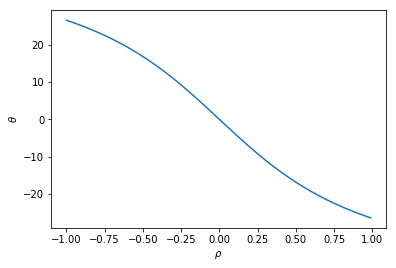

In [5]:
rho = np.arange(-1, 1, 0.01)
plt.figure( )
theta = (180/np.pi) * np.arctan(2*rho*sigma1*sigma2/(sigma1**2- sigma2**2) ) /2
# theta 负是顺时针旋转
plt.plot(rho ,theta)
plt.xlabel(r'$\rho$')
plt.ylabel(r'$\theta$')
plt.savefig("../rho.png")
plt.show()

### 衰减系数

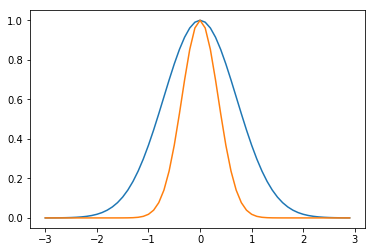

In [6]:
x = np.arange(-3, 3, 0.1)
aa = [1,4]
for a in aa:
    y = np.exp(-a*x**2)
    plt.plot(x ,y)
plt.show()